In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow_probability import layers as tfpl
from tensorflow_probability import math as tfpm

2023-05-10 16:43:47.137423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 16:43:47.203197: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:

import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
import seaborn as sbn

In [3]:
SOURCE = Path('/mnt/data extra/DATASET/PREDICTION_DATA')
DATA_22 = SOURCE.joinpath('unidad de medida 2022').with_suffix('.csv')
DATA_23 = SOURCE.joinpath('unidad de medida 2023').with_suffix('.csv')

## Preparacion de cargar y analizar datos modelo

Cargar y Concatenar informacion 

In [4]:
data_complete_22 = pd.read_csv(str(DATA_22),header=[0])
data_complete_22.drop(0,axis=0,inplace=True)
data_complete_23 = pd.read_csv(str(DATA_23),header=[0])
data_complete_23.drop(0,axis=0,inplace=True)
data_complete = pd.concat([data_complete_22,data_complete_23])
data_complete.reset_index(drop=True,inplace=True)
display(data_complete.head())

/tmp/ipykernel_26020/1143381664.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_complete_22 = pd.read_csv(str(DATA_22),header=[0])


,Fecha Creación,Material,Material (Cod),Peso neto (TON),Solicitate,Solicitate (Cod),Unidad Medida Base,Unidad Medida Venta,Cant Pedido UMV,Valor Neto,Contador Ped
0,1/1/2022,Cemento Fuerte Ecoplanet 50 kg,10011308.0,10.00,HECTOR QUINTANILLA BALAGUERA,0004155696,TO,SAC,200.0,"3,844.5",1
1,1/2/2022,Cemento Fuerte Ecoplanet 50 kg,10011308.0,10.00,FERRETERIA EL FERROL/ CHIQUINQUIRA,0004158888,TO,SAC,200.0,"3,939.1",1
2,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.0,34.19,PLANTA SUR CREDITO,0004151082,TO,TO,34.2,"11,863.9",1
3,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.0,33.33,PLANTA MILENIO,0004139983,TO,TO,33.3,"11,346.9",1
4,1/3/2022,CEMENTO ESPECIAL PLUS (ESP+),10059053.0,33.61,PLANTA NEREIDAS CREDITO,0004150188,TO,TO,33.6,"11,662.7",1


Seleccion de columnas

In [5]:
SELECT_COLUMNS = ['Fecha Creación','Material (Cod)','Peso neto (TON)','Solicitate (Cod)','Cant Pedido UMV','Valor Neto']
data_complete = data_complete[SELECT_COLUMNS]
display(data_complete.head())

,Fecha Creación,Material (Cod),Peso neto (TON),Solicitate (Cod),Cant Pedido UMV,Valor Neto
0,1/1/2022,10011308.0,10.00,0004155696,200.0,"3,844.5"
1,1/2/2022,10011308.0,10.00,0004158888,200.0,"3,939.1"
2,1/3/2022,10059053.0,34.19,0004151082,34.2,"11,863.9"
3,1/3/2022,10059053.0,33.33,0004139983,33.3,"11,346.9"
4,1/3/2022,10059053.0,33.61,0004150188,33.6,"11,662.7"


Conversion de tipos de datos

In [6]:
data_complete.dtypes

Fecha Creación       object
Material (Cod)      float64
Peso neto (TON)     float64
Solicitate (Cod)     object
Cant Pedido UMV      object
Valor Neto           object
dtype: object

In [7]:
data_complete

,Fecha Creación,Material (Cod),Peso neto (TON),Solicitate (Cod),Cant Pedido UMV,Valor Neto
0,1/1/2022,10011308.0,10.000,0004155696,200.0,"3,844.5"
1,1/2/2022,10011308.0,10.000,0004158888,200.0,"3,939.1"
2,1/3/2022,10059053.0,34.190,0004151082,34.2,"11,863.9"
3,1/3/2022,10059053.0,33.330,0004139983,33.3,"11,346.9"
4,1/3/2022,10059053.0,33.610,0004150188,33.6,"11,662.7"
...,...,...,...,...,...,...
105666,3/27/2023,10011308.0,34.500,4125819.0,690.0,"14,974.4"
105667,3/27/2023,10011308.0,35.500,4125819.0,710.0,"15,408.4"
105668,3/27/2023,10011309.0,34.000,4171362.0,"3,200.0","45,146.9"
105669,3/27/2023,10011309.0,35.020,4171362.0,"2,472.0","34,876.0"


In [8]:
format = '%m/%d/%Y'
data_complete['Fecha Creación']=pd.to_datetime(data_complete['Fecha Creación'], format=format)
data_complete['Material (Cod)'] = data_complete['Material (Cod)'].apply(lambda x: np.int32(x))
# data_complete['Peso neto (TON)'] = data_complete['Peso neto (TON)'].apply(lambda x: np.float(x))
data_complete['Solicitate (Cod)'] = data_complete['Solicitate (Cod)'].apply(lambda x: str(x))                                                          
data_complete['Cant Pedido UMV'] = data_complete['Cant Pedido UMV'].apply(lambda x: float(x.replace(',','')))
data_complete['Valor Neto'] = data_complete['Valor Neto'].apply(lambda x: float(x.replace(',','')))

Cambio de nombre

In [9]:
old = data_complete.columns
new = ['FECHA','MATERIAL','PESO','COMPRADOR','CANTIDAD','VALOR']
data_complete.rename(columns={old_:new_ for old_,new_ in zip(old,new)},inplace=True)
display(data_complete.head())

,FECHA,MATERIAL,PESO,COMPRADOR,CANTIDAD,VALOR
0,2022-01-01,10011308,10.00,0004155696,200.0,3844.5
1,2022-01-02,10011308,10.00,0004158888,200.0,3939.1
2,2022-01-03,10059053,34.19,0004151082,34.2,11863.9
3,2022-01-03,10059053,33.33,0004139983,33.3,11346.9
4,2022-01-03,10059053,33.61,0004150188,33.6,11662.7


In [10]:
data_complete.dtypes

FECHA        datetime64[ns]
MATERIAL              int32
PESO                float64
COMPRADOR            object
CANTIDAD            float64
VALOR               float64
dtype: object

Correcion de la columan de datos de compra para el uso de para cuantificar bien el ID del Comprador por dia

Numero de materiales que dispone la empresa y cantidad de apariciones de datos a lo largo de 2 anos, con una distribucion de tiempo por dia 

In [12]:
cantidad_materiales = pd.DataFrame(data_complete.MATERIAL.value_counts())
display(cantidad_materiales)

,MATERIAL
10011308,38588
10070707,14130
10059053,6515
10011306,5935
10011305,2315
...,...
96044601,1
96018785,1
96018801,1
96018813,1


Separacion de los datos en otras distancia de series de tiempo

In [13]:
#Cambio de indice
data_complete['Dia'] = data_complete.FECHA.dt.day
data_complete['Mes'] = data_complete.FECHA.dt.month
data_complete['Año'] = data_complete.FECHA.dt.year
data_complete['Semana'] = data_complete.FECHA.dt.isocalendar().week 
data_complete['DiaSemana'] = data_complete.FECHA.dt.day_of_week
display(data_complete)

,FECHA,MATERIAL,PESO,COMPRADOR,CANTIDAD,VALOR,Dia,Mes,Año,Semana,DiaSemana
0,2022-01-01,10011308,10.000,4155696,200.0,3844.5,1,1,2022,52,5
1,2022-01-02,10011308,10.000,4158888,200.0,3939.1,2,1,2022,52,6
2,2022-01-03,10059053,34.190,4151082,34.2,11863.9,3,1,2022,1,0
3,2022-01-03,10059053,33.330,4139983,33.3,11346.9,3,1,2022,1,0
4,2022-01-03,10059053,33.610,4150188,33.6,11662.7,3,1,2022,1,0
...,...,...,...,...,...,...,...,...,...,...,...
105666,2023-03-27,10011308,34.500,4125819,690.0,14974.4,27,3,2023,13,0
105667,2023-03-27,10011308,35.500,4125819,710.0,15408.4,27,3,2023,13,0
105668,2023-03-27,10011309,34.000,4171362,3200.0,45146.9,27,3,2023,13,0
105669,2023-03-27,10011309,35.020,4171362,2472.0,34876.0,27,3,2023,13,0


# Seleccion de producto y generacion de fecha

In [14]:
#Cambio de indice
PRODUCTO = 10011308
# data_complete.set_index('FECHA',inplace=True)
df = data_complete[data_complete.MATERIAL == PRODUCTO]

In [15]:
df.head()

,FECHA,MATERIAL,PESO,COMPRADOR,CANTIDAD,VALOR,Dia,Mes,Año,Semana,DiaSemana
0,2022-01-01,10011308,10.0,4155696,200.0,3844.5,1,1,2022,52,5
1,2022-01-02,10011308,10.0,4158888,200.0,3939.1,2,1,2022,52,6
14,2022-01-03,10011308,5.0,4181050,100.0,2423.4,3,1,2022,1,0
15,2022-01-03,10011308,5.0,4177946,100.0,2011.2,3,1,2022,1,0
16,2022-01-03,10011308,35.0,4122784,1400.0,23119.4,3,1,2022,1,0


In [16]:
df = df.groupby(df.FECHA).sum()
index = pd.date_range(df.index[0],df.index.max())
fill_index = pd.DataFrame([ x for x in range(len(index)) ],index=index)
df = df.reindex(fill_index.index, fill_value=0)

/tmp/ipykernel_26020/3434205304.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.FECHA).sum()


In [17]:
df['DIA'] = df.index.day
df['MES'] = df.index.month
df['ANO'] = df.index.year
df['SEMANA'] = df.index.isocalendar().week 
df['DIASEMANA'] = df.index.day_of_week

In [18]:
X = df[['DIA','MES','ANO','SEMANA','DIASEMANA']]
Y = df[['CANTIDAD']]

In [19]:
Y.describe()

,CANTIDAD
count,451.000000
mean,55835.226164
std,37782.714497
min,0.000000
25%,32124.500000
50%,61008.000000
75%,76732.500000
max,310201.000000


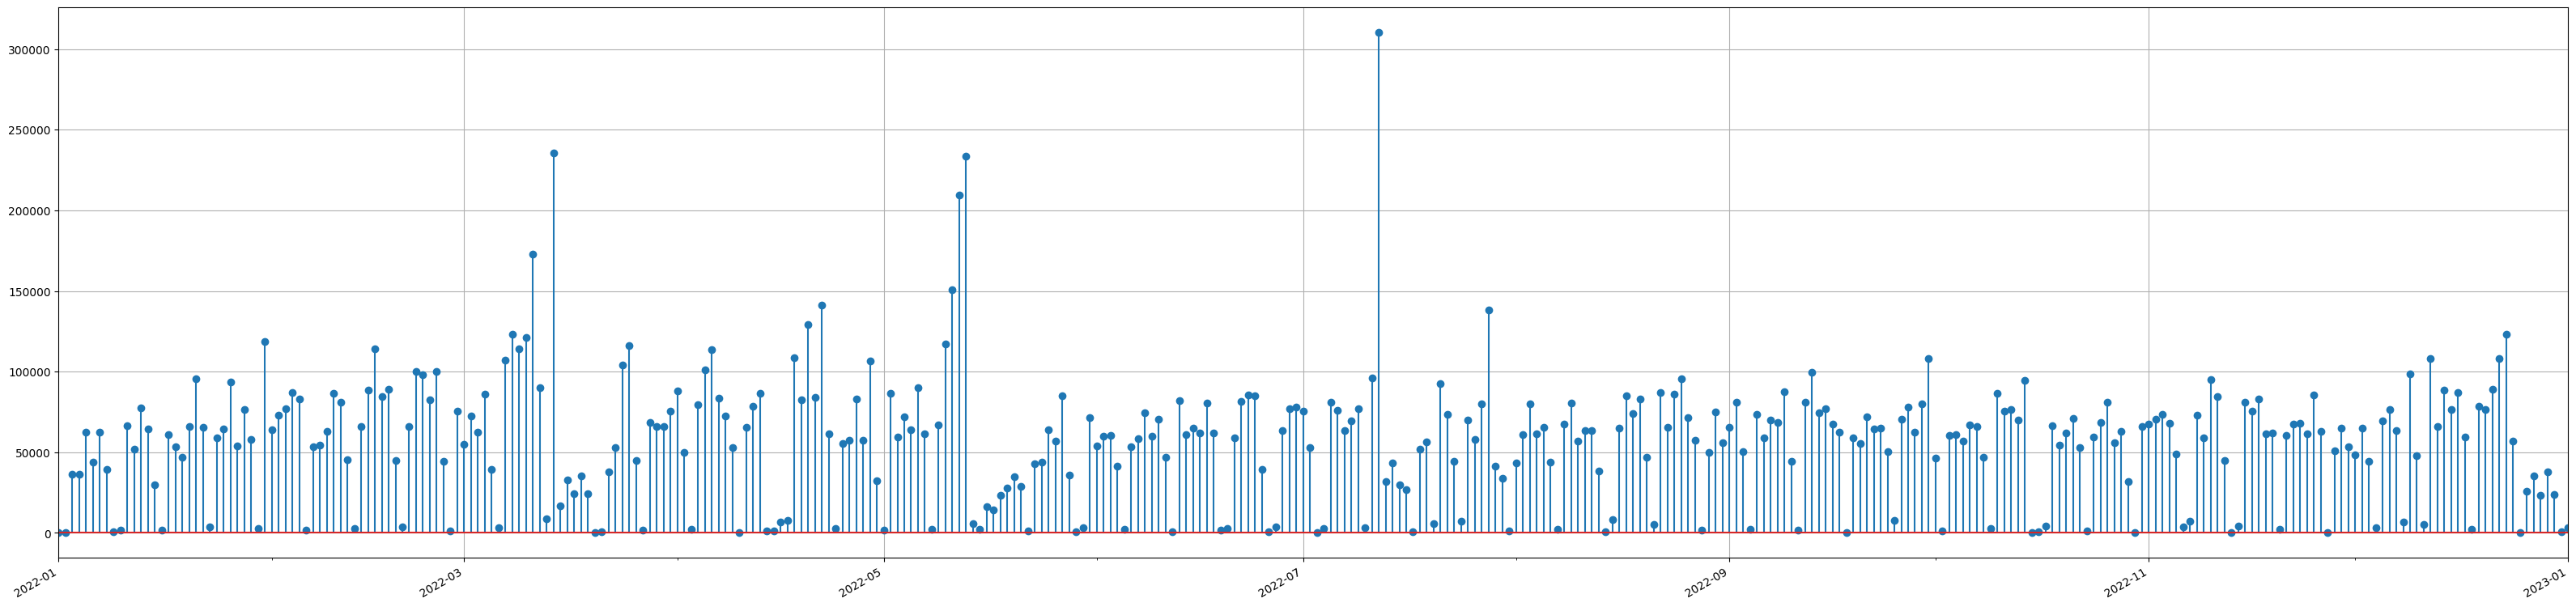

In [20]:
fig, ax = plt.subplots(figsize=(40,10))
ax.stem(df.index,df['CANTIDAD'].values)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin =np.datetime64(df.index.min(), 'Y')
datemax =np.datetime64(df.index.max(), 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
# ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

In [21]:
data_per_weeks = df.groupby([pd.Grouper(freq='W')])['CANTIDAD'].sum()
data_per_weeks = pd.DataFrame(data_per_weeks)

data_per_weeks['MES'] = data_per_weeks.index.month
data_per_weeks['ANO'] = data_per_weeks.index.year
data_per_weeks['SEMANA'] = data_per_weeks.index.isocalendar().week 

display(data_per_weeks)
df = data_per_weeks

,CANTIDAD,MES,ANO,SEMANA
2022-01-02,400.0,1,2022,52
2022-01-09,281300.0,1,2022,1
2022-01-16,293822.0,1,2022,2
2022-01-23,391555.0,1,2022,3
2022-01-30,407864.0,1,2022,4
...,...,...,...,...
2023-03-05,381386.0,3,2023,9
2023-03-12,353466.0,3,2023,10
2023-03-19,411243.0,3,2023,11
2023-03-26,388934.0,3,2023,12


In [22]:
train_frac = 0.8
n_train = int(train_frac * len(df))

train_df = df.iloc[:n_train]
test_df = df.iloc[n_train:]

In [23]:
X_columns = ['MES', 'ANO', 'SEMANA']
y_column = 'CANTIDAD'

X_train = train_df[X_columns].values
y_train = train_df[y_column].values

X_test = test_df[X_columns].values
y_test = test_df[y_column].values


In [24]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y= StandardScaler()
Y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))


# Utiliza X_train_scaled y X_test_scaled al entrenar y evaluar la NNGP


In [25]:
def create_sliding_window_data(X, y, window_size):
    X_windowed = []
    y_windowed = []
    
    for i in range(len(X) - window_size):
        X_windowed.append(X[i:i + window_size])
        y_windowed.append(y[i + window_size])
        
    return np.array(X_windowed), np.array(y_windowed)


In [26]:
window_size = 4

X_train_windowed, y_train_windowed = create_sliding_window_data(X_train_scaled, Y_train_scaled, window_size)
X_test_windowed, y_test_windowed = create_sliding_window_data(X_test_scaled, y_test_scaled, window_size)


In [27]:
n_layers = 2
n_neurons = 50
activation_fn = tf.nn.relu
# kernel_fn = tfpm.nn.relu_kernel

nngp_model = tf.keras.Sequential()

for _ in range(n_layers):
    nngp_model.add(tf.keras.layers.TimeDistributed(tfpl.DenseReparameterization(
        input_shape=(window_size, 5),
        units=n_neurons,
        activation=None,
        kernel_prior_fn=tfpl.default_multivariate_normal_fn,
        kernel_posterior_fn=tfpl.default_mean_field_normal_fn())))

    nngp_model.add(tf.keras.layers.TimeDistributed(tfpl.DistributionLambda(
        lambda t: tfd.Normal(loc=t, scale=1.0))))

# Añade una capa LSTM o GRU si deseas incluir la estructura temporal
nngp_model.add(tf.keras.layers.LSTM(32))

nngp_model.add(tf.keras.layers.Dense(1))


2023-05-10 16:43:49.488358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-10 16:43:49.499201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-10 16:43:49.499313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [28]:
# # Especifica la profundidad de la red y el número de neuronas por capa
# n_layers = 2
# n_neurons = 50

# # Crea la función de activación y el kernel de la NNGP
# activation_fn = tf.nn.relu
# # kernel_fn = tfpm.nn.relu_kernel

# # Construye el modelo NNGP
# nngp_model = tf.keras.Sequential()
# for _ in range(n_layers):
#     nngp_model.add(tfpl.DenseReparameterization(input_shape=(5,),
#                                                 units=n_neurons,
#                                                 activation=None,
#                                                 kernel_prior_fn=tfpl.default_multivariate_normal_fn,
#                                                 kernel_posterior_fn=tfpl.default_mean_field_normal_fn()))
#     nngp_model.add(tfpl.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1.0)))


In [29]:
# Compila y entrena el modelo
# nngp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss=lambda y, rv_y: -rv_y.log_prob(y))
nngp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
nngp_model.fit(X_train_windowed, y_train_windowed, epochs=800, verbose=2)

Epoch 1/800


/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/home/bdebian/.virtualenvs/predeman/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(
2023-05-10 16:43:53.027223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-10 16:43:53.789387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8900
2023-05-10 16:43:53.868200: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55910894de70 initialized for p

2/2 - 4s - loss: 6705.4165 - 4s/epoch - 2s/step
Epoch 2/800
2/2 - 0s - loss: 6650.3423 - 7ms/epoch - 3ms/step
Epoch 3/800
2/2 - 0s - loss: 6596.2837 - 6ms/epoch - 3ms/step
Epoch 4/800
2/2 - 0s - loss: 6542.8750 - 6ms/epoch - 3ms/step
Epoch 5/800
2/2 - 0s - loss: 6490.1543 - 6ms/epoch - 3ms/step
Epoch 6/800
2/2 - 0s - loss: 6437.7651 - 7ms/epoch - 4ms/step
Epoch 7/800
2/2 - 0s - loss: 6385.7656 - 6ms/epoch - 3ms/step
Epoch 8/800
2/2 - 0s - loss: 6334.0195 - 8ms/epoch - 4ms/step
Epoch 9/800
2/2 - 0s - loss: 6282.3765 - 7ms/epoch - 3ms/step
Epoch 10/800
2/2 - 0s - loss: 6230.8789 - 6ms/epoch - 3ms/step
Epoch 11/800
2/2 - 0s - loss: 6179.5054 - 5ms/epoch - 3ms/step
Epoch 12/800
2/2 - 0s - loss: 6128.2456 - 6ms/epoch - 3ms/step
Epoch 13/800
2/2 - 0s - loss: 6077.0210 - 7ms/epoch - 4ms/step
Epoch 14/800
2/2 - 0s - loss: 6025.7954 - 6ms/epoch - 3ms/step
Epoch 15/800
2/2 - 0s - loss: 5974.7578 - 7ms/epoch - 3ms/step
Epoch 16/800
2/2 - 0s - loss: 5923.6353 - 7ms/epoch - 4ms/step
Epoch 17/800
2/

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

In [32]:
#Predicciones  modelos
y_test_pred_dist = nngp_model(X_test_windowed)

for data_test,prediction_data,original in zip(X_test_windowed,y_test_pred_dist,y_test_windowed):
    inverse_y_pred = scaler_y.inverse_transform(prediction_data.numpy().reshape(-1, 1))
    inverse_y_test = scaler_y.inverse_transform(original.reshape(-1, 1))
    prediccion_modelo = inverse_y_pred.squeeze()
    original = inverse_y_test.squeeze()
    
    # error = mse([original], [prediccion_modelo])
    
    
    X_test_mont = scaler_x.inverse_transform(data_test)
    display(pd.DataFrame(X_test_mont,columns=['MES','ANO','SEMANA']))
    display(pd.DataFrame({'Prediccion':[prediccion_modelo],'Orignal':[original]}))##,'Error':[error]}))

,MES,ANO,SEMANA
0,1.0,2023.0,52.0
1,1.0,2023.0,1.0
2,1.0,2023.0,2.0
3,1.0,2023.0,3.0


,Prediccion,Orignal
0,430241.7,394146.0


,MES,ANO,SEMANA
0,1.0,2023.0,1.0
1,1.0,2023.0,2.0
2,1.0,2023.0,3.0
3,1.0,2023.0,4.0


,Prediccion,Orignal
0,425868.8,452245.0


,MES,ANO,SEMANA
0,1.0,2023.0,2.0
1,1.0,2023.0,3.0
2,1.0,2023.0,4.0
3,2.0,2023.0,5.0


,Prediccion,Orignal
0,435966.06,511573.0


,MES,ANO,SEMANA
0,1.0,2023.0,3.0
1,1.0,2023.0,4.0
2,2.0,2023.0,5.0
3,2.0,2023.0,6.0


,Prediccion,Orignal
0,416548.62,454124.0


,MES,ANO,SEMANA
0,1.0,2023.0,4.0
1,2.0,2023.0,5.0
2,2.0,2023.0,6.0
3,2.0,2023.0,7.0


,Prediccion,Orignal
0,407550.47,419833.0


,MES,ANO,SEMANA
0,2.0,2023.0,5.0
1,2.0,2023.0,6.0
2,2.0,2023.0,7.0
3,2.0,2023.0,8.0


,Prediccion,Orignal
0,432781.75,381386.0


,MES,ANO,SEMANA
0,2.0,2023.0,6.0
1,2.0,2023.0,7.0
2,2.0,2023.0,8.0
3,3.0,2023.0,9.0


,Prediccion,Orignal
0,448531.72,353466.0


,MES,ANO,SEMANA
0,2.0,2023.0,7.0
1,2.0,2023.0,8.0
2,3.0,2023.0,9.0
3,3.0,2023.0,10.0


,Prediccion,Orignal
0,416834.1,411243.0


,MES,ANO,SEMANA
0,2.0,2023.0,8.0
1,3.0,2023.0,9.0
2,3.0,2023.0,10.0
3,3.0,2023.0,11.0


,Prediccion,Orignal
0,412919.47,388934.0


,MES,ANO,SEMANA
0,3.0,2023.0,9.0
1,3.0,2023.0,10.0
2,3.0,2023.0,11.0
3,3.0,2023.0,12.0


,Prediccion,Orignal
0,396530.62,7280.0


<AxesSubplot: >

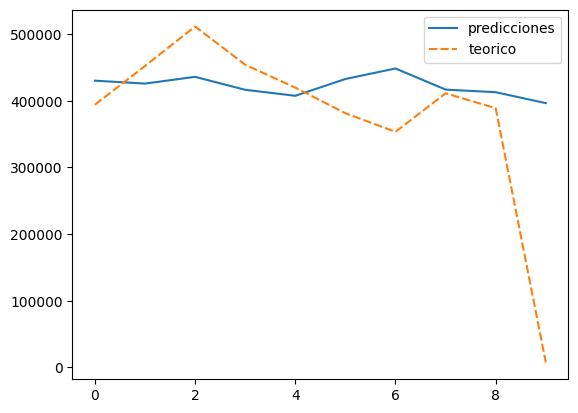

In [33]:
inverse_y_pred = scaler_y.inverse_transform(y_test_pred_dist.numpy())

inverse_y_test = scaler_y.inverse_transform(y_test_windowed)

date_y = pd.DataFrame({'predicciones':inverse_y_pred.reshape(-1),'teorico':inverse_y_test.reshape(-1)})

date_y

sbn.lineplot(data = date_y[['predicciones','teorico']])